# Importing the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =======================================================
# ADD ANY OTHER PACKAGE HERE
# =======================================================

# P1. Generalized Firing-Rate-Based Network Models 

## Introduction to the model 

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">You have been introduced to the dynamics of synapses and postsynaptic neurons in a simple network. We can summarize the activity in a generalised firing-rate-based neural network using two coupled differential equations. </p> </font> <br> 
    <font size = 5>
    $$
    \begin{gather}
       \tau_s\;\frac{dI_s}{dt} = -I_s + w.u \\
       \tau_r\;\frac{dv}{dt} = -v + F(I_s(t))
    \end{gather}
    $$
    </font> <br>
</div>
<div>
    <font face = "Tahoma" size = 4><p style = "text-indent:25px;line-height:1.3">Where <b>w</b> and <b>u</b> are matrices representing the synaptic weights and presynaptic neurons' firing rates respectively and F is a non-linear function of the total synaptic input current. <br>
        <p style = "text-indent:25px;line-height:1.3">One such famous function used in computational neuroscience is the Sigmoid function defined as :
    </font> <br> 
</div>
<div>
    <font size = 5>
    $$
    \begin{gather}
       S(x) = \frac{1}{1 + e^{-x}}
    \end{gather}
    $$
    </font> <br>
</div>

## Briefing

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">Assume you have 6 presynaptic neurons with predetermined firing rates. These 6 neurons interact with a single postsynaptic one using some predetermined weights as well. Complete the functions to solve the coupled differential equations and plot the dynamics. </p> </font>

## Defining the parameters 

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">The function below sets some default values to the parameters. You can manipulate the values or add other parameters using keyword arguments.</p> </font>
    
</div>

In [2]:
def def_params(**kwargs):
    pars = {}

    pars['tau_s'] = 1
    pars['tau_r'] = 1

    pars['firing_rates'] = np.asarray([0.7, 0.82, 0.67, 0.1, 0.03, 0.24])
    pars['weights'] = np.asarray([1, 1, 1, -1, -1, -1])

    for k in kwargs:
        pars[k] = kwargs[k]

    return pars

## Implementation (30 Points)

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;"> You must generate a figure like below. </p> </font>

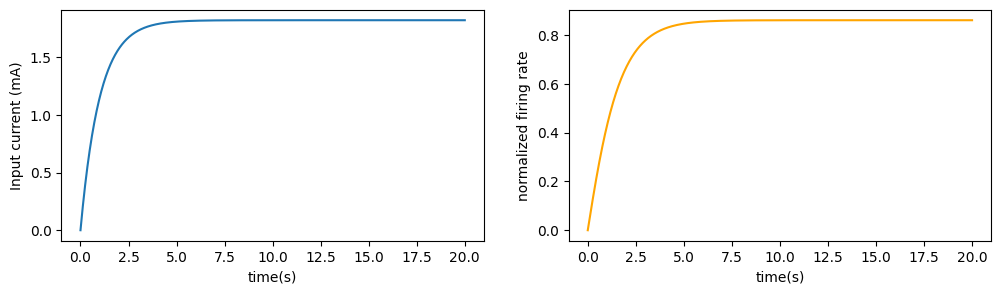

In [3]:
# The function you pass to odeint as an argument. you must calculate dv/dt at each timestep
def F(x):
    return (1 / (1 + np.exp(-x)))

def F_tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def network_equations(y0, time, pars):
    # ================================================================
    dIsdt = (-y0[0] + np.dot(pars['weights'], pars['firing_rates'])) / pars['tau_s']
    dvdt = (-y0[1] + F(y0[0])) / pars['tau_r']
    return [dIsdt, dvdt]
    # ================================================================

In [4]:
def run_network():
    # Initialize the output firing rate and total input current with zero
    initials = [0, 0]

    # Set up the timescale
    time = np.linspace(0, 20, 1000)

    #solve the ODE using odeint
    pars = def_params()
    sol = odeint(network_equations, initials, time, args=(pars,))

    # Generate the demanded figure and plots
    # ================================================================

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(time, sol[:, 0], linewidth=4)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Total Input Current (Is)')
    ax1.set_title('Total Input Current')

    ax2.plot(time, sol[:, 1], color='red', linewidth=4)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Postsynaptic Neuron Activity (v)')
    ax2.set_title('Postsynaptic Neuron Activity')

    plt.tight_layout()
    plt.show()
    # ================================================================

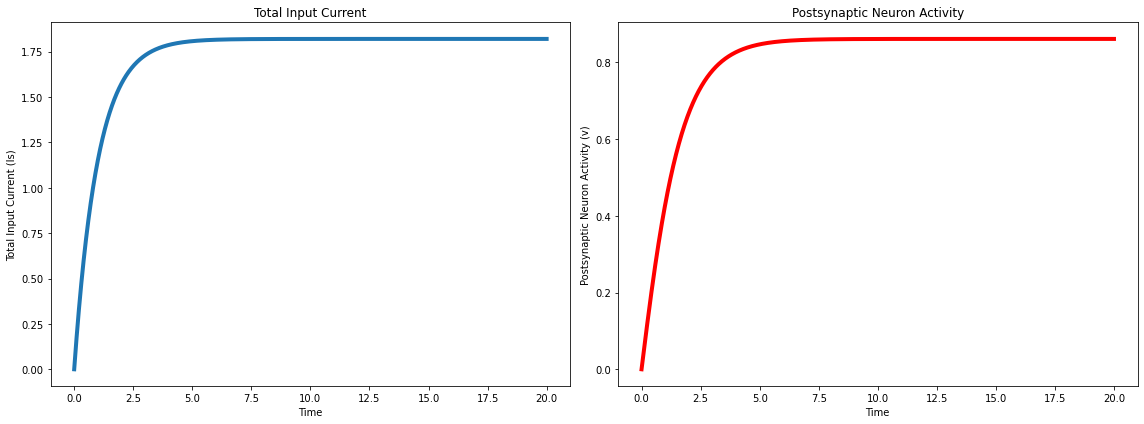

In [5]:
run_network()

## Questions

<div>
    <font face = "Tahoma" size = 4> 
        Answer the questions below by using the functions above and provide the figures you generate in your report.
        <ol style = "line-height:1.5;">
            <b><li> Manipulate the time constants. Can you make the input reach a steady state much faster than the output? (5 Points) </b>
            <b><li> Try out the model for other non-linear functions. Do you spot any difference? (10 Points) </b>
            <b><li> Can you compare this model with a perceptron network? Can we classify input using this network as well? (5 Points) </b>
        </ol>
    </font>  
</div>

# P2. Reservoir Computing

## Briefing 

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">Reservoir Computing is an extension to Recurrent Neural Networks which can be used to capture 
        dynamic changes in an input stimulus and predict <b>timeseries</b> values. It consists of a Reservoir layer of 
neurons in a <b>recurrent configuration</b> with random connectivity. The main feature of a reservoir is that 
the output firing rates of the neurons is solely dependent upon the input values and previous states 
rather than the initial condition. The weights of connections being <b>completely random</b>, helps the model 
trace chaotic timeseries values where no apparent linear rule can be observed. </p>
        <p style = "text-indent:25px; line-height:1.3;">The outputs from the Reservoir layer are directly fed into a Readout layer which consists of a simple 
<b>feedforward network</b>. the Readout layer attempts to learn the supposedly random states of the 
Reservoir layer using a set of training data. The training process includes adjusting the feedforward 
weights until all states of the Reservoir lead to appropriate firing rates in the output that correspond to the 
target data. This procedure is usually accompanied by backward propagation and adjusting the gradient of a loss function to be zero. </p></font>
</div>

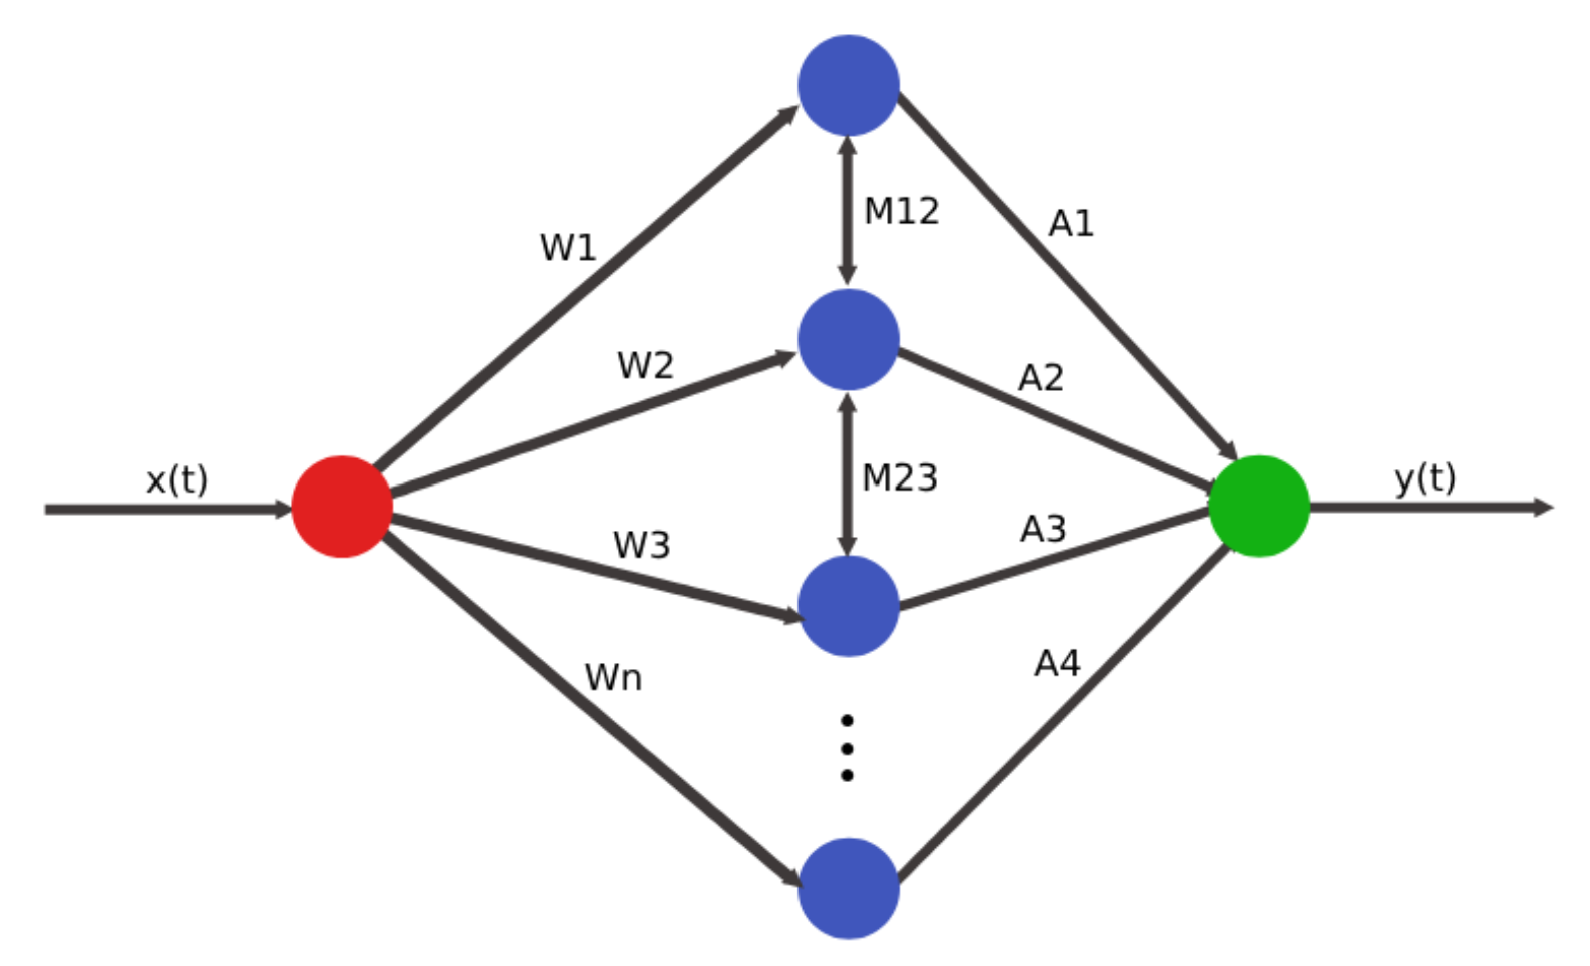

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">For example in the figure above the blue neurons construct a recurrent network which is called the Reservoir and all of the weights W and M are determined randomly in the range (-1,1). The green neuron in this example is the readout layer which tries to determine the weights A such that the output has the least deviation from the target value. In brief, Reservoir Computation is a technique to predict the output values of a timeseries. </p> </font>
</div>

## Simplification 

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">In this question, we want to simplify the parameters a little bit. First of all, assume that the neurons in the Reservoir layer have a rather small time constant and thus reach their steady-state potential instantaenously after the application of the input current. Provided this assumption, the time variable is no longer of importance and thus only x and y can be considered as the input and output of the system. the steady-state response of the neurons in this layer can be calculated as follows.</p> <br></font>
</div>
<div>
    <font size = 5>
    $$
    \begin{gather}
       v(x) = \frac{1}{1 + e^{-W.x + M.v}}
    \end{gather}
    $$
    </font> <br>
</div>
<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">Where <b>W</b> is a vector consisting of the feedforward weigths and <b>M</b> is a square matrix consisting of the recurrent weigths.</p> <br>
        <p>Secondly, assume that the timeseries we are trying to predict is completely <b>linear</b> (y is a linear function of x).
        </p>
        <p>Finally, ignore the Readout layer and the optimization problem! You need only feed the states of the Reservoir neurons to a <b>linear regression classifier</b>. In order to do so, you must first select a part of your data as the training data. This section is used to optimize the regression coefficients and derive a linear rule. The rest of the data will be used for predicting and determining the accuracy of the system.
        </p> <br>
    </font>
</div>

## Implementation (20 Points)

In [6]:
def generate_series(max_input):
    # Create the timeseries
    x = np.arange(0, max_input, 1)
    y = 5.83 * x - 6.2
    
    # Shuffle the order of values while keeping together the input/output pairs
    # ================================================================
    indices = np.random.permutation(len(x))
    x = x[indices]
    y = y[indices]
    # ================================================================
    
    # Use a constant coefficient to normalize the data since we don't want enormous values appearing in the system
    x_norm = x.reshape(-1,1) / 1000
    y_norm = y.reshape(-1,1) / 1000
    
    return x_norm, y_norm

In [7]:
def generate_network(networkSize):
    # Generate random weights
    w = np.random.normal(0.2, scale = 1, size = networkSize)
    m = np.random.normal(0.2, scale = 1, size = (networkSize, networkSize))

    # Correct the weights outside the range (-1,1) and also make sure elements on the diagonal are zero
    # ================================================================
    w = np.clip(w, -1, 1)
    np.fill_diagonal(m, 0)
    m = np.clip(m, -1, 1)
    # ================================================================

    return w, m

In [8]:
def reservoir_compute():
    networkSize = 50
    max_input = 1000
    x, y = generate_series(max_input)
    w, m = generate_network(networkSize)

    # Determine the steady-state responses of the Reservoir neurons per each input (x)
    states = np.zeros((len(x), networkSize))
    for i in range(len(x)):
        if i == 0:
            states[i] = 1 / (1 + np.exp(-w * x[i] - np.dot(m, states[i])))
        else:
            states[i] = 1 / (1 + np.exp(-w * x[i] - np.dot(m, states[i-1])))
    return states, y

In [9]:
states, y = reservoir_compute()

#split the states and y data into train and test segments
states_train, states_test, y_train, y_test = train_test_split(states, y, test_size=0.2, random_state=42)

#fit a linear regression model
reg = LinearRegression().fit(states_train, y_train)

#predict the output (y) for the remaining test segment
y_pred = reg.predict(states_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[ 4.99422359e+03 -1.93482162e+01  1.74596534e+00 -3.15040176e+05
  -6.17736919e+00 -6.67468212e-01  2.23689666e+05  1.08363497e+01
   4.05275604e+01  1.74857246e+01  6.21768367e-01 -2.16519293e+00
   3.03370990e+00  1.16062313e+05 -2.61196117e+03 -7.93818361e+01
   2.66835539e+00  7.22742802e+00 -2.82770956e+03  2.51169776e+01
  -3.35812622e+00 -4.18145462e+01 -1.04451561e+02  8.06215307e-01
   6.58562975e+03  2.95305784e+04 -2.50946768e+05  4.26286596e+00
   2.15179145e+01  5.66616944e-01  2.95871550e+05 -2.97776898e+01
  -2.63000338e+01  2.09232469e+02 -4.54864385e+00  5.54304358e+00
  -1.00442106e+03 -3.60996478e+04  1.27083085e+02 -1.57705947e+03
  -2.21464945e+01 -8.30249765e+00  7.15889670e+00 -6.34674849e+01
   1.24717041e+03  2.06440185e+01  3.68027122e+01 -3.88839427e+03
  -2.18697304e+04 -7.96968253e+01]]
Mean squared error: 0.00
Coefficient of determination: 1.00


## Bonus (15 Points)

<div>
    <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">Now instead of assuming a perfectly linear model, add some gaussian noise to the output (y) when generating the timeseries. Can you still achieve a high accuracy?</p> <br></font>
</div>

In [10]:
# ================================================================
def reservoir_compute_with_noise():
    networkSize = 50
    max_input = 1000
    x, y = generate_series(max_input)
    y = y + np.random.normal(0.2, scale = 1, size = len(y)).reshape(-1, 1)
    w, m = generate_network(networkSize)

    # Determine the steady-state responses of the Reservoir neurons per each input (x)
    states = np.zeros((len(x), networkSize))
    for i in range(len(x)):
        if i == 0:
            states[i] = 1 / (1 + np.exp(-w * x[i] - np.dot(m, states[i])))
        else:
            states[i] = 1 / (1 + np.exp(-w * x[i] - np.dot(m, states[i-1])))
    return states, y
# ================================================================

In [11]:
states, y = reservoir_compute_with_noise()

#split the states and y data into train and test segments
states_train, states_test, y_train, y_test = train_test_split(states, y, test_size=0.2, random_state=42)

#fit a linear regression model
reg = LinearRegression().fit(states_train, y_train)

#predict the output (y) for the remaining test segment
y_pred = reg.predict(states_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.20428318e+06  5.61568437e+06  6.22980012e+04 -3.41204393e+03
  -2.35204808e+07 -5.71030383e+05  6.22960936e+04  2.83649398e+06
  -2.15286425e+03 -1.75938245e+03  1.03016461e+07 -1.73606953e+03
   6.30175089e+01  3.29430151e+04 -9.66158166e+02 -3.71288947e+06
   1.13287762e+06  1.45873115e+05  2.38024857e+04 -3.41907751e+05
  -5.58278544e+02  2.20456195e+02 -2.93548703e+06  1.25805185e+05
   4.08130669e+04 -4.45391411e+06 -3.10599429e+03  5.49632069e+04
   3.79691993e+03  2.67627680e+06  2.06882913e+07 -1.62700277e+06
  -3.29964662e+04  2.56026207e+01  2.74118583e+04 -1.14440614e+05
  -3.56453715e+02 -7.33304076e+03 -1.56775121e+02  4.87280471e+02
  -1.19694829e+04 -6.02296899e+02  1.21162480e+03 -6.66499386e+01
  -1.41642805e+03  3.51123653e+01 -3.70772370e+04 -4.85790951e+03
   8.58927598e+02 -1.27251530e+03]]
Mean squared error: 1.25
Coefficient of determination: 0.69
